In [49]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Perceptron(nn.Module) :
    def __init__(self, input_dim) :
        super(Perceptron, self).__init__()   ##
        self.fc1 = nn.Linear(input_dim, 1)

    def forward(self, x_in) :
        return torch.sigmoid(self.fc1(x_in)).squeeze() ##

### 활성화함수

시그모이드 함수
- 시그모이드 함수는 입력 범위 대부분에서 매우 빠르게 포화됨.
- 그레디언트가 0이 되거나 발산하여 부동소수 오버플로가 되는 문제가 발생: vanishing gradient problem, exploding gradient problem
- 신경망에서 시그모이드 함수는 출력층에서 주로 사용

C:\Users\thdus\AppData\Local\Temp\ipykernel_22632\3041561449.py:4: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5, 5, 0.1)


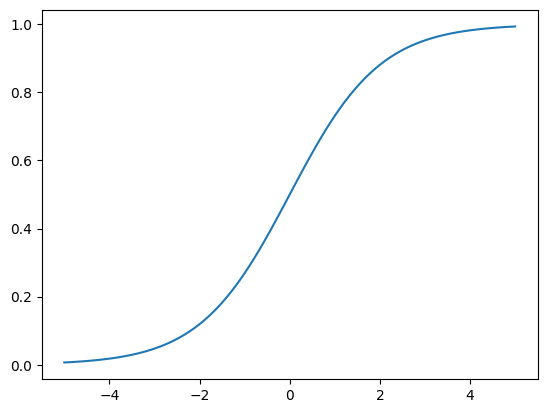

In [6]:
# 시그모이드
import torch
import matplotlib.pyplot as plt 
x = torch.range(-5, 5, 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

하이퍼볼릭 탄젠트
- 시그모이드 함수의 변종: 시그모이드 함수의 선형 변환 

C:\Users\thdus\AppData\Local\Temp\ipykernel_22632\1303371783.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5, 5, 0.1)


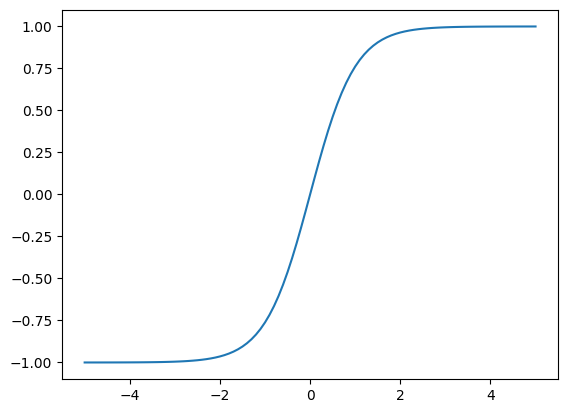

In [8]:
# 하이퍼볼릭 탄젠트
x = torch.range(-5, 5, 0.1)
y = torch.tanh(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

렐루 함수
- 음수값을 0으로 자르는 함수
- 음수를 제거해 그레디언트 소실 문제에 도움이 됨. 
- 죽은 렐루 현상을 줄이기 위해 리키렐루나 PReLU 활성화 함수가 개발됨


C:\Users\thdus\AppData\Local\Temp\ipykernel_22632\2856637780.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5, 5, 0.1)


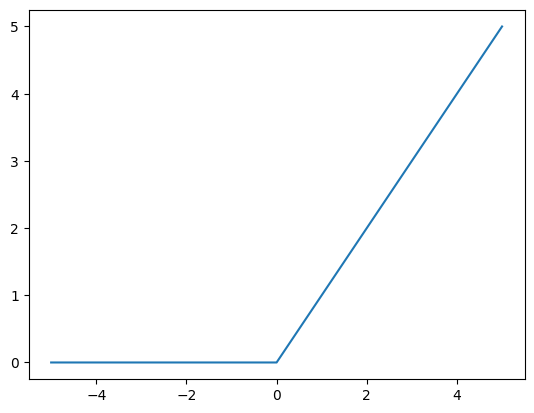

In [10]:
# 렐루
x = torch.range(-5, 5, 0.1)
relu = torch.nn.ReLU()
y = relu(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

C:\Users\thdus\AppData\Local\Temp\ipykernel_22632\143469232.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5, 5, 0.1)


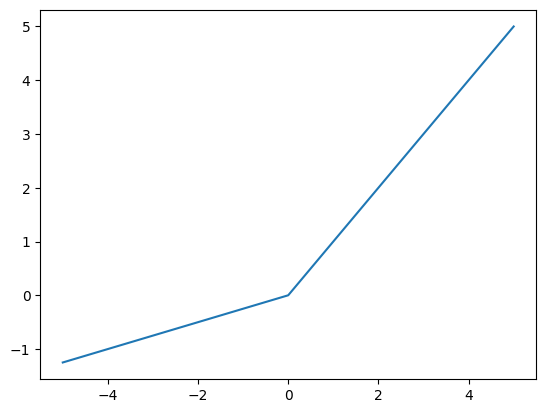

In [18]:
# Parametric ReLU
x = torch.range(-5, 5, 0.1)
prelu = torch.nn.PReLU(num_parameters=1)
y = prelu(x)

plt.plot(x.numpy(), y.detach().numpy())
plt.show()

소프트맥스
- 출력을 0과 1 사이로 압축함
- 모든 출력의 합으로 각 출력을 나누어 k개의 클래스에 대한 이산 확률 분포를 만듦
- 소프트맥스 출력의 합은 1이 됨
- 소프트맥수 함수는 확률 기반의 목적함수인 범주형 크로스 엔트로피와 함께 사용함

In [19]:
# 소프트맥스
softmax = nn.Softmax(dim = 1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim = 1))

tensor([[-0.6280, -0.1144,  1.9839]])
tensor([[0.0614, 0.1026, 0.8361]])
tensor([1.])


### 손실함수

평균제곱오차손실(MSE)
- 신경망의 출력과 타켓이 연속값인 회귀 문제에서 널리 사용하는 손실 함수
- MAE, RMSE 등도 있음

In [21]:
mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)
loss = mse_loss(outputs, targets)
print(loss)

tensor(2.7379, grad_fn=<MseLossBackward0>)


범주형 크로스 엔트로피 손실
- 출력을 클래스 소속 확률에 대한 예측으로 이해할 수 있는 다중분류 문제에 사용

In [28]:
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1, 0, 3], dtype = torch.int64)
loss = ce_loss(outputs, targets)
print(loss)

tensor(1.8960, grad_fn=<NllLossBackward0>)


이진 크로스 엔트로피 손실
- 클래스 두 개를 구별하는 작업에 효율적인 손실함수

In [37]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad = True))
targets = torch.tensor([1, 0, 1, 1], dtype = torch.float32).view(4, 1)
loss = bce_loss(probabilities, targets)
print(probabilities)
print(loss)


tensor([[0.3388],
        [0.3241],
        [0.3241],
        [0.6528]], grad_fn=<SigmoidBackward0>)
tensor(0.7568, grad_fn=<BinaryCrossEntropyBackward0>)


### 예제 데이터 만들기

In [41]:
# 예제데이터 생성 코드
LEFT_CENTER = (3, 3)
RIGHT_CENTER = (3, -2)
def get_toy_data(batch_size, left_center=LEFT_CENTER, right_center=RIGHT_CENTER):
    x_data = []
    y_targets = np.zeros(batch_size)
    for batch_i in range(batch_size):
        if np.random.random() > 0.5:
            x_data.append(np.random.normal(loc=left_center))
        else:
            x_data.append(np.random.normal(loc=right_center))
            y_targets[batch_i] = 1
    return torch.tensor(x_data, dtype=torch.float32), torch.tensor(y_targets, dtype=torch.float32)

In [42]:
# 예제데이터 시각화 코드
def visualize_results(perceptron, x_data, y_truth, n_samples=1000, ax=None, epoch=None, 
                      title='', levels=[0.3, 0.4, 0.5], linestyles=['--', '-', '--']):
    y_pred = perceptron(x_data)
    y_pred = (y_pred > 0.5).long().data.numpy().astype(np.int32)

    x_data = x_data.data.numpy()
    y_truth = y_truth.data.numpy().astype(np.int32)

    n_classes = 2

    all_x = [[] for _ in range(n_classes)]
    all_colors = [[] for _ in range(n_classes)]
    
    colors = ['black', 'white']
    markers = ['o', '*']
    
    for x_i, y_pred_i, y_true_i in zip(x_data, y_pred, y_truth):
        all_x[y_true_i].append(x_i)
        if y_pred_i == y_true_i:
            all_colors[y_true_i].append("white")
        else:
            all_colors[y_true_i].append("black")
        #all_colors[y_true_i].append(colors[y_pred_i])

    all_x = [np.stack(x_list) for x_list in all_x]

    if ax is None:
        _, ax = plt.subplots(1, 1, figsize=(10,10))
        
    for x_list, color_list, marker in zip(all_x, all_colors, markers):
        ax.scatter(x_list[:, 0], x_list[:, 1], edgecolor="black", marker=marker, facecolor=color_list, s=300)
    
        
    xlim = (min([x_list[:,0].min() for x_list in all_x]), 
            max([x_list[:,0].max() for x_list in all_x]))
            
    ylim = (min([x_list[:,1].min() for x_list in all_x]), 
            max([x_list[:,1].max() for x_list in all_x]))
            
    # 초평면
    
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    
    Z = perceptron(torch.tensor(xy, dtype=torch.float32)).detach().numpy().reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=levels, linestyles=linestyles)    
    
    plt.suptitle(title)
    
    if epoch is not None:
        plt.text(xlim[0], ylim[1], "Epoch = {}".format(str(epoch)))

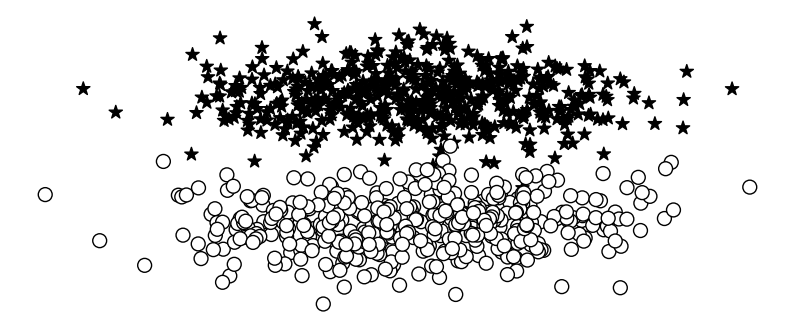

In [47]:
import numpy as np
seed = 1337

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)

x_data, y_truth = get_toy_data(batch_size=1000)

x_data = x_data.data.numpy()
y_truth = y_truth.data.numpy()

left_x = []
right_x = []
left_colors = []
right_colors =  []

for x_i, y_true_i in zip(x_data, y_truth):
    color = 'black'

    if y_true_i == 0:
        left_x.append(x_i)
        left_colors.append(color)

    else:
        right_x.append(x_i)
        right_colors.append(color)

left_x = np.stack(left_x)
right_x = np.stack(right_x)

_, ax = plt.subplots(1, 1, figsize=(10,4))

ax.scatter(left_x[:, 0], left_x[:, 1], color=left_colors, marker='*', s=100)
ax.scatter(right_x[:, 0], right_x[:, 1], facecolor='white', edgecolor=right_colors, marker='o', s=100)

plt.axis('off');

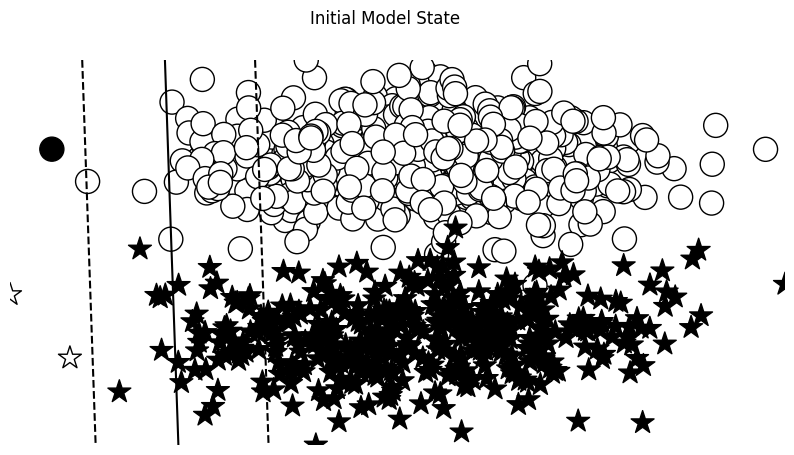

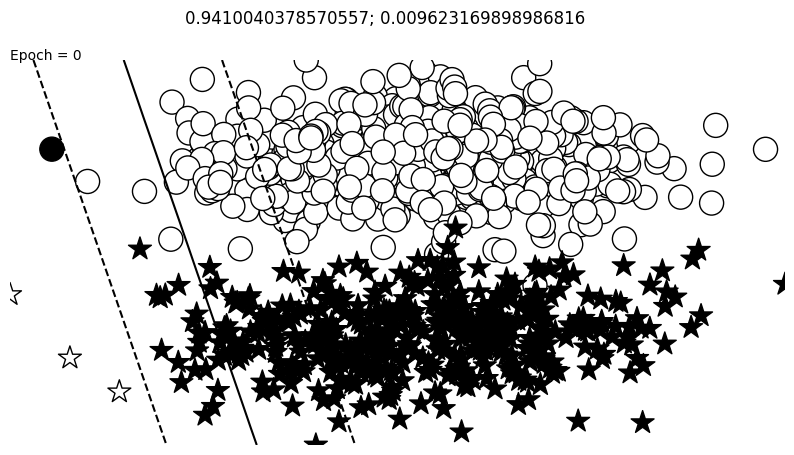

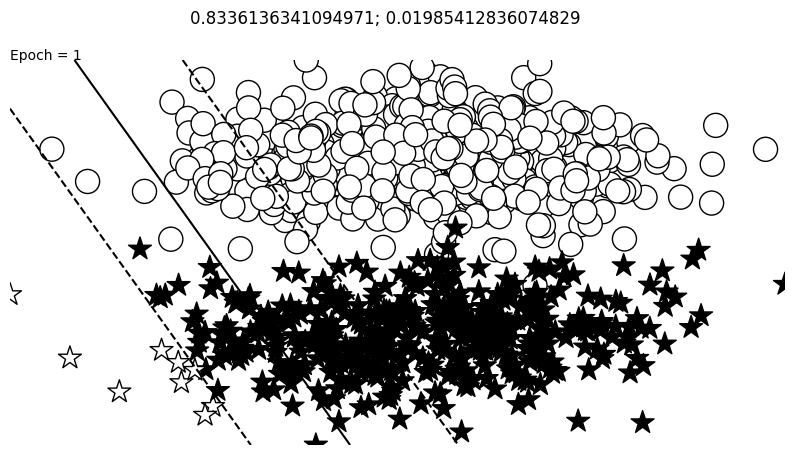

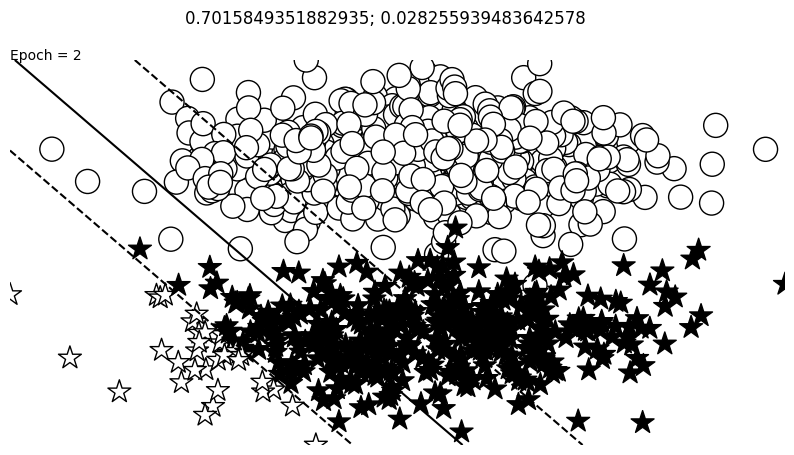

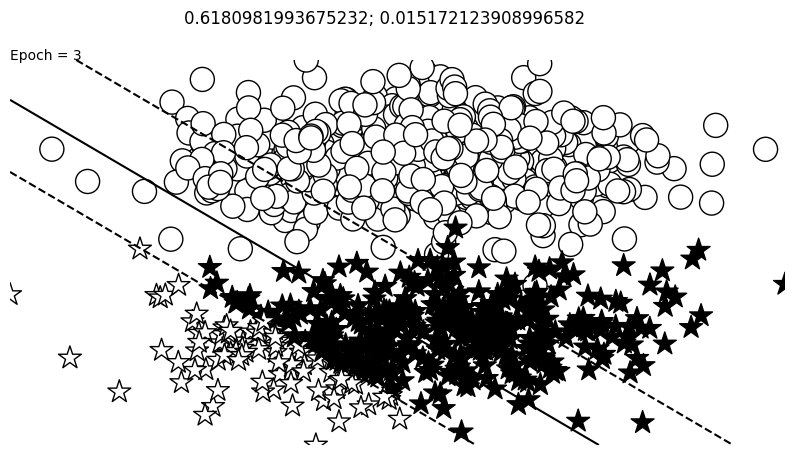

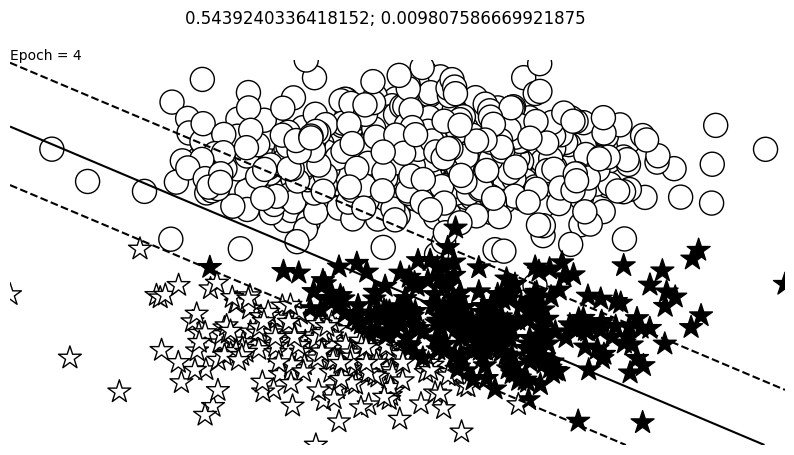

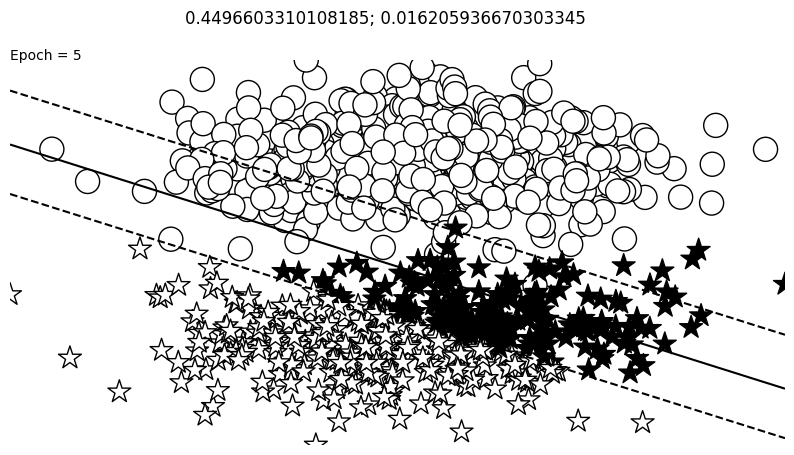

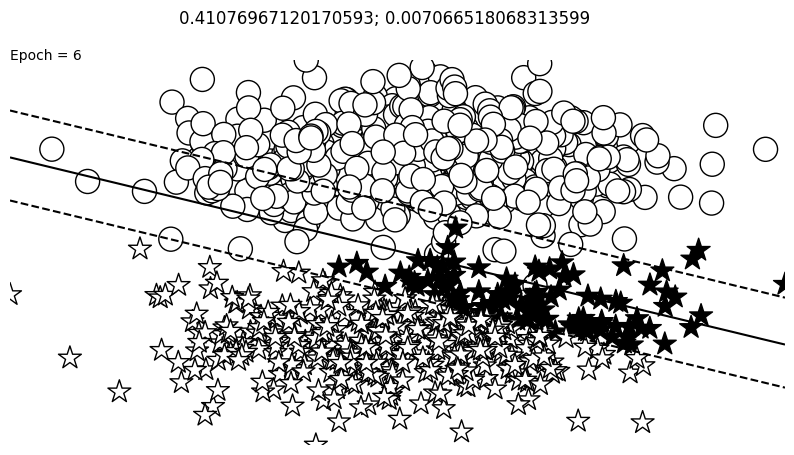

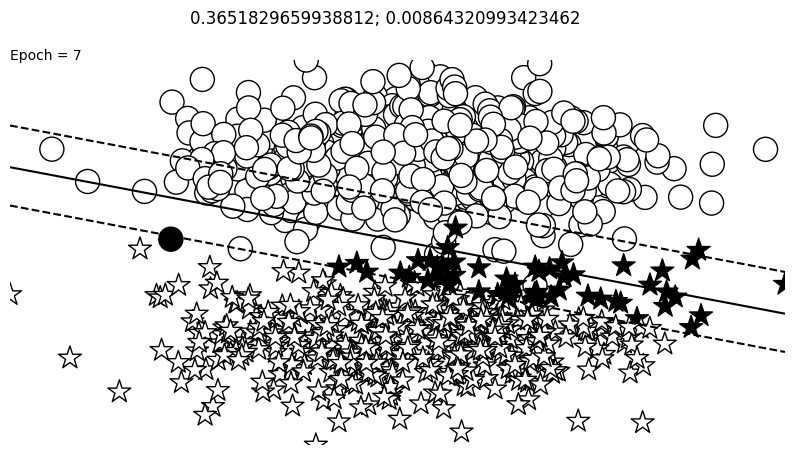

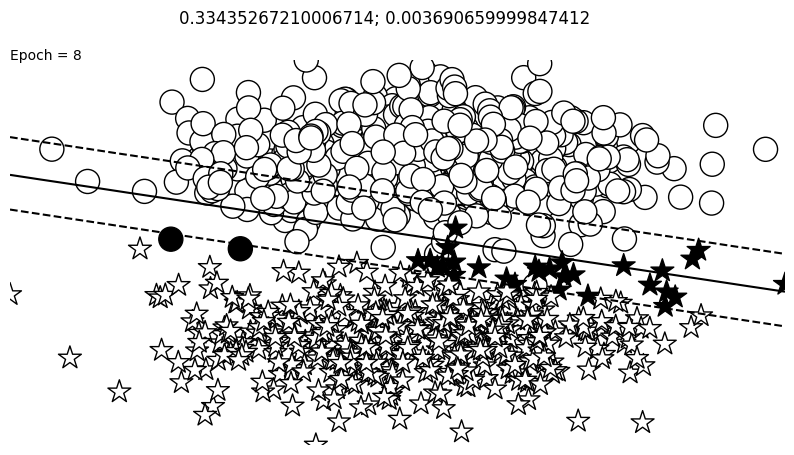

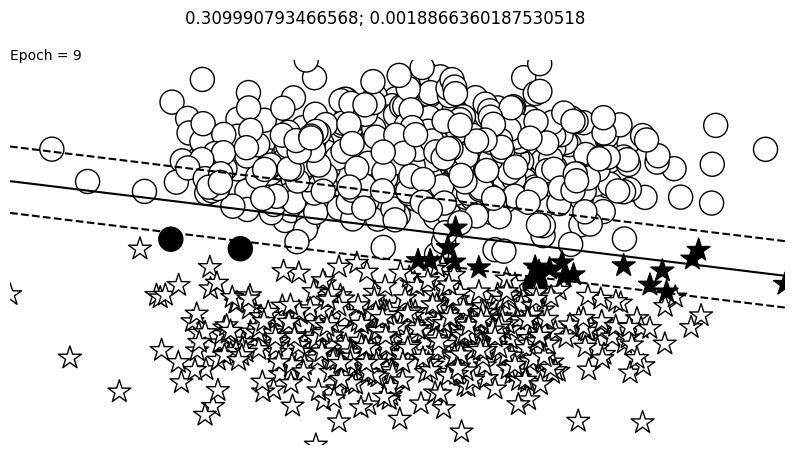

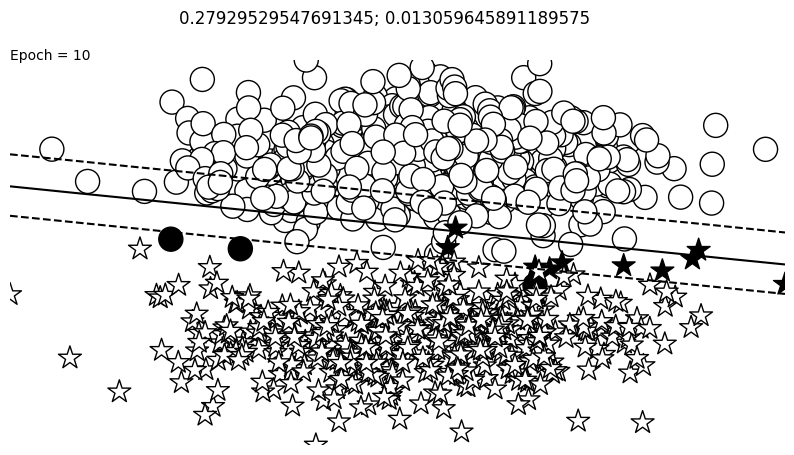

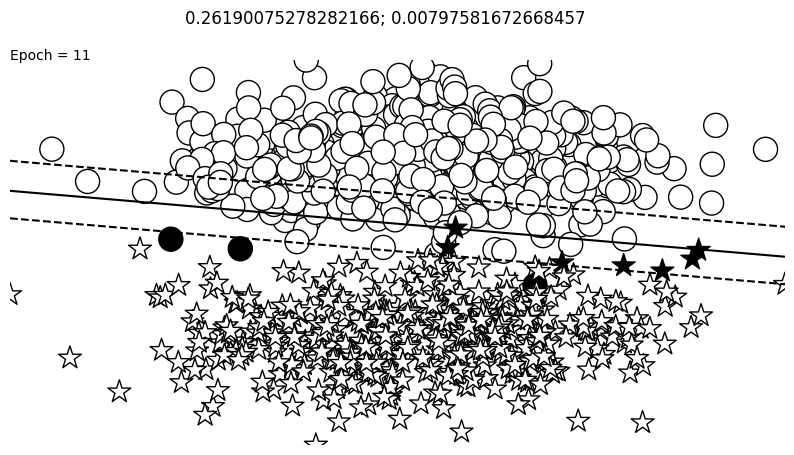

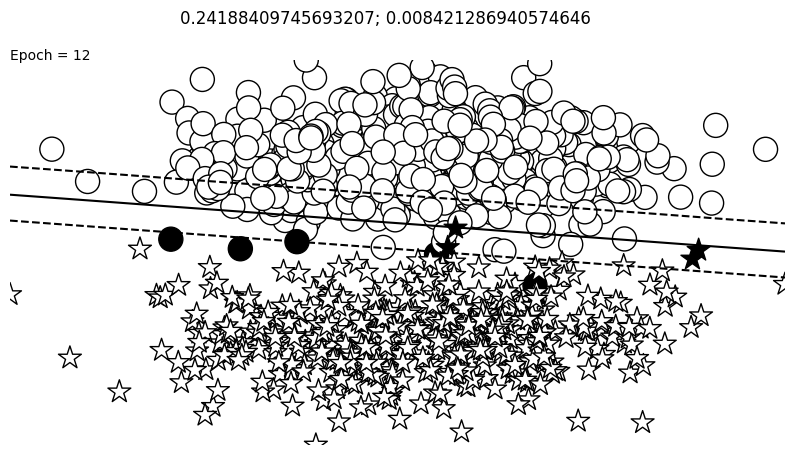

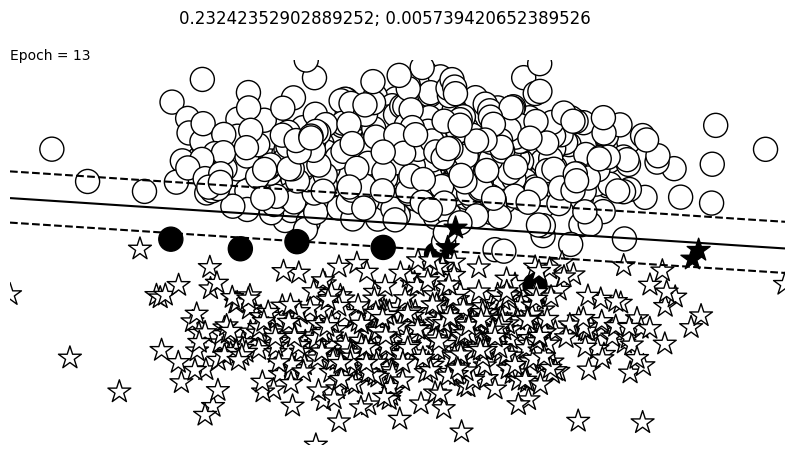

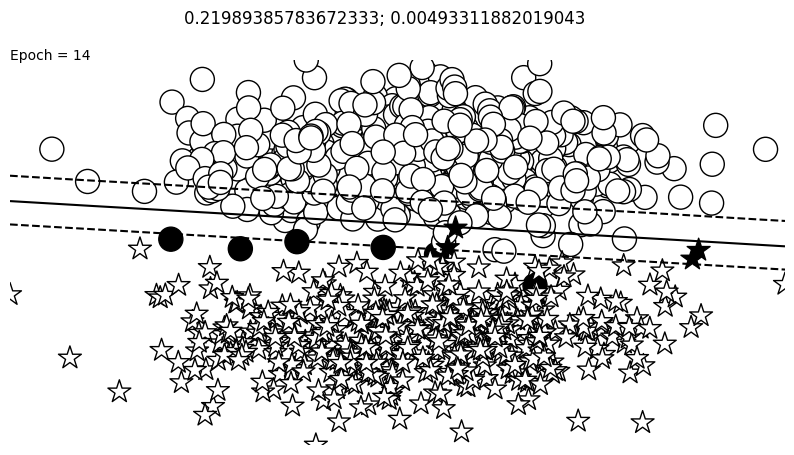

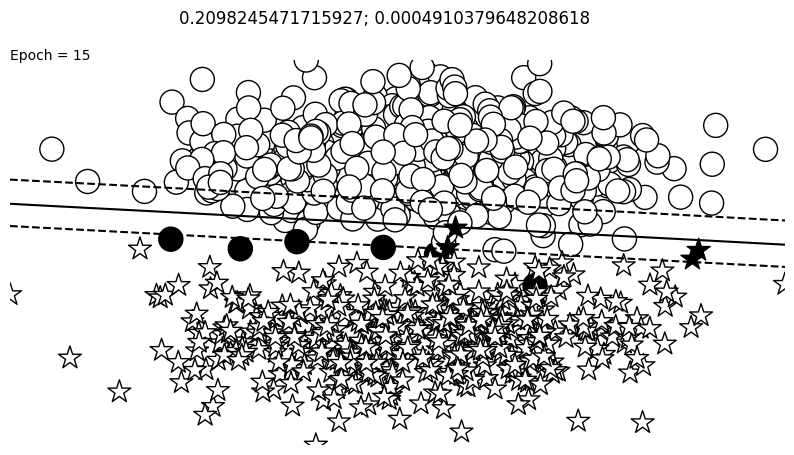

In [50]:
# 훈련과정
lr = 0.01
input_dim = 2

batch_size = 1000
n_epochs = 12
n_batches = 5

# 시드 고정
seed = 1337
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)

# 활성화함수/옵티마이저/손실함수
perceptron = Perceptron(input_dim=input_dim)
optimizer = optim.Adam(params=perceptron.parameters(), lr=lr)
bce_loss = nn.BCELoss()

losses = []

x_data_static, y_truth_static = get_toy_data(batch_size)
fig, ax = plt.subplots(1, 1, figsize=(10,5))
visualize_results(perceptron, x_data_static, y_truth_static, ax=ax, title='Initial Model State')
plt.axis('off')
#plt.savefig('initial.png')

# 
change = 1.0
last = 10.0
epsilon = 1e-3
epoch = 0
while change > epsilon or epoch < n_epochs or last > 0.3:
#for epoch in range(n_epochs):
    for _ in range(n_batches):

        optimizer.zero_grad()
        x_data, y_target = get_toy_data(batch_size)
        y_pred = perceptron(x_data).squeeze()
        loss = bce_loss(y_pred, y_target)
        loss.backward()
        optimizer.step()
        
        loss_value = loss.item()
        losses.append(loss_value)

        change = abs(last - loss_value)
        last = loss_value
               
    fig, ax = plt.subplots(1, 1, figsize=(10,5))
    visualize_results(perceptron, x_data_static, y_truth_static, ax=ax, epoch=epoch, 
                      title=f"{loss_value}; {change}")
    plt.axis('off')
    epoch += 1
    #plt.savefig('epoch{}_toylearning.png'.format(epoch))